In [16]:
# @title Setup and Load the data
import pandas as pd
import matplotlib.pyplot as plt
import calendar

path_to_dataset = '/content/data.csv'
student_list = pd.read_csv(path_to_dataset)

In [24]:
# @title Data cleaning

# Drop the order number column
student_list.drop('Số TT', axis=1, inplace=True)

# Replacing gender column from Vietnamese to English
student_list['Giới tính'].replace('Nam', 'Male', inplace=True)
student_list['Giới tính'].replace('Nữ', 'Female', inplace=True)
student_list.rename(columns={'Giới tính': 'Gender'}, inplace=True)

# same for course column
course = 'Ngành đào tạo'
print(set(student_list[course].tolist()))

vietnamese = ['Công nghệ thông tin – Truyền thông',
              'Khoa học Vũ trụ và Công nghệ Vệ tinh',
              'Công nghệ Kỹ thuật Cơ điện tử',
              'Kỹ thuật ô tô',
              'Khoa học vật liệu tiên tiến và Công nghệ Nano',
              'An toàn thông tin',
              'Khoa học và Công nghệ y khoa',
              'Khoa học Môi trường Ứng dụng',
              'Toán ứng dụng',
              'Hóa học',
              'Khoa học và Công nghệ thực phẩm',
              'Công nghệ sinh học – Phát triển thuốc',
              'Khoa học dữ liệu',
              'Vật lý Kỹ thuật – Điện tử',
              'Kỹ thuật Hàng không',
              'Kĩ thuật điện và Năng lượng tái tạo']

english = ['Information Technology - Communication',
           'Space Science and Satellite Technology',
           'Mechatronics Engineering Technology',
           'Automotive Engineering',
           'Advanced Materials Science and Nanotechnology',
           'Information Security',
           'Science and Medical Technology',
           'Applied Environmental Science',
           'Applied Mathematics', 'Chemistry',
           'Science and Food Technology',
           'Biotechnology - Drug Development',
           'Data Science',
           'Physical Engineering - Electronics',
           'Aviation Engineering',
           'Electrical Engineering and Renewable Energy'
           ]

student_list[course] = student_list[course].replace(vietnamese, english)

{'Kỹ thuật ô tô', 'Toán ứng dụng', 'Khoa học Vũ trụ và Công nghệ Vệ tinh', 'Công nghệ thông tin – Truyền thông', 'Công nghệ sinh học – Phát triển thuốc', 'Khoa học và Công nghệ thực phẩm', 'Công nghệ Kỹ thuật Cơ điện tử', 'Vật lý Kỹ thuật – Điện tử', 'Khoa học vật liệu tiên tiến và Công nghệ Nano', 'Khoa học dữ liệu', 'Khoa học và Công nghệ y khoa', 'An toàn thông tin', 'Khoa học Môi trường Ứng dụng', 'Kỹ thuật Hàng không', 'Hóa học', 'Kĩ thuật điện và Năng lượng tái tạo'}


In [5]:
student_list

,Họ và Tên,Ngày sinh,Gender,Mã tuyển sinh/Số báo danh,Ngành đào tạo
0,CHU MINH ANH,18/08/2005,Female,01065872,Biotechnology - Drug Development
1,ĐÀO HỒNG ANH,24/10/2005,Female,01015919,Biotechnology - Drug Development
2,GIANG PHƯƠNG ANH,22/02/2005,Female,01021860,Biotechnology - Drug Development
3,LÊ HÀ TÚ ANH,25/03/2005,Female,01021897,Biotechnology - Drug Development
4,MAI QUỲNH ANH,19/08/2005,Female,01052872,Biotechnology - Drug Development
...,...,...,...,...,...
933,ĐINH THỊ LINH TRÂM,13/07/2005,Female,28034244,Science and Medical Technology
934,NGUYỄN LÂM TÙNG,11/03/2005,Male,09001498,Science and Medical Technology
935,PHẠM THANH YẾN,10/07/2005,Female,03018527,Science and Medical Technology
936,ODINAEV AZIZBEK,16/06/2005,Male,2023031041,Applied Mathematics


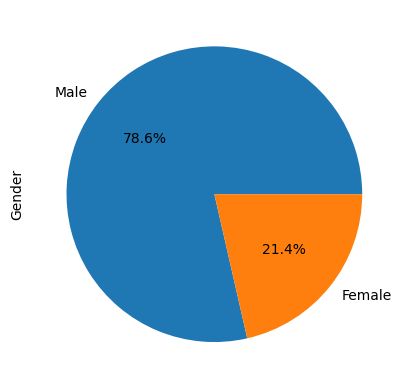

In [6]:
student_list['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

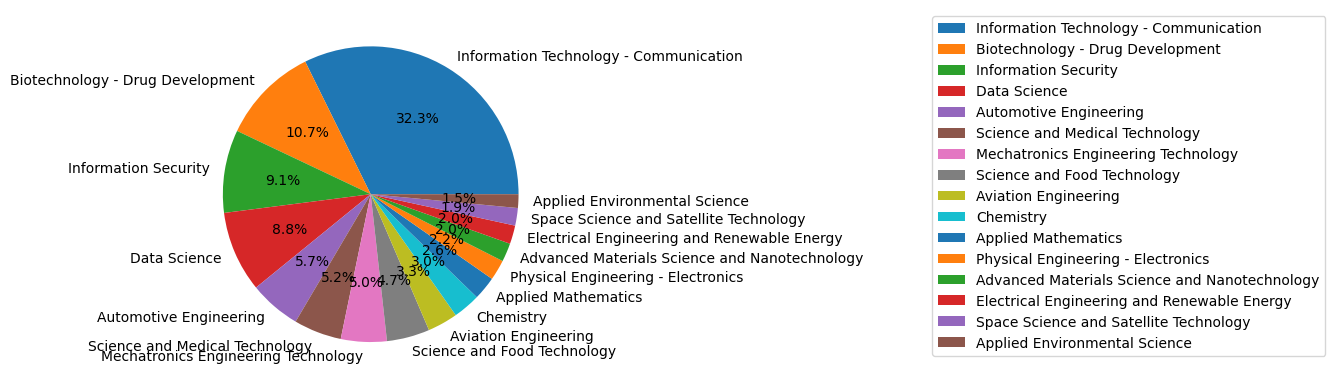

In [7]:
ax = student_list['Ngành đào tạo'].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(2, 1), loc='upper left')

# change the title of the plot
plt.ylabel("")

plt.show()

In [27]:
# @title Count male-female in a course
major = 'Chemistry' # @param ['Space Science and Satellite Technology', 'Automotive Engineering', 'Electrical Engineering and Renewable Energy', 'Aviation Engineering', 'Chemistry', 'Physical Engineering - Electronics', 'Data Science', 'Information Security', 'Information Technology - Communication', 'Applied Environmental Science', 'Biotechnology - Drug Development', 'Applied Mathematics', 'Science and Medical Technology', 'Science and Food Technology', 'Advanced Materials Science and Nanotechnology', 'Mechatronics Engineering Technology']
print(student_list[student_list[course] == major]['Gender'].value_counts())

Male      15
Female    13
Name: Gender, dtype: int64


In [26]:
counts = student_list.groupby(course)['Gender'].value_counts().unstack()

# calculate ratio of male to female
def ratio(x):
  return x['Male'] / x['Female']

counts['ratio'] = counts.apply(ratio, axis=1)

# sort ratios in descending order and assign rank
counts = counts.sort_values('ratio', ascending=True)
counts['rank'] = counts['ratio'].rank(method='dense', ascending=False)

print(counts)

Gender                                         Female   Male      ratio  rank
Ngành đào tạo                                                                
Biotechnology - Drug Development                 72.0   28.0   0.388889  14.0
Science and Medical Technology                   29.0   20.0   0.689655  13.0
Chemistry                                        13.0   15.0   1.153846  12.0
Science and Food Technology                      20.0   24.0   1.200000  11.0
Applied Environmental Science                     4.0   10.0   2.500000  10.0
Space Science and Satellite Technology            4.0   14.0   3.500000   9.0
Advanced Materials Science and Nanotechnology     4.0   15.0   3.750000   8.0
Data Science                                     12.0   71.0   5.916667   7.0
Information Security                              9.0   76.0   8.444444   6.0
Physical Engineering - Electronics                2.0   19.0   9.500000   5.0
Information Technology - Communication           28.0  275.0   9

In [37]:
birthday = 'Ngày sinh'

# Convert your list of timestamps to a pandas series
birthday_series = pd.Series(student_list[birthday].tolist())

# Sort your series by the date values
birthday_series = birthday_series.sort_values()
pd.set_option("display.max_rows", None)


# Print the table
print(birthday_series)


152   1998-08-25
604   2001-09-14
586   2001-09-26
701   2002-05-04
191   2002-09-01
887   2003-03-17
582   2003-03-27
259   2003-04-04
725   2003-05-01
742   2003-10-16
578   2004-02-01
829   2004-02-01
741   2004-04-20
200   2004-06-18
588   2004-07-01
682   2004-07-08
920   2004-07-18
769   2004-11-19
647   2004-11-30
793   2004-12-01
295   2004-12-07
652   2004-12-27
22    2005-01-01
547   2005-01-01
27    2005-01-01
511   2005-01-01
532   2005-01-02
463   2005-01-03
875   2005-01-03
768   2005-01-03
481   2005-01-04
505   2005-01-04
878   2005-01-05
310   2005-01-06
368   2005-01-06
285   2005-01-06
674   2005-01-06
531   2005-01-07
905   2005-01-07
640   2005-01-07
767   2005-01-08
929   2005-01-08
73    2005-01-08
412   2005-01-08
438   2005-01-09
132   2005-01-09
243   2005-01-09
88    2005-01-10
803   2005-01-11
35    2005-01-11
413   2005-01-11
848   2005-01-11
631   2005-01-12
583   2005-01-12
514   2005-01-13
630   2005-01-13
61    2005-01-13
77    2005-01-14
255   2005-01-